# Exploration of Sentiment Analysis on Movie Reviews

For this exploration, We have explored the given data for the Kaggle Exploration of Sentiment Analysis on Movie Reviews. 

We start out by loading our data, libraries, and filtering out the null entries.

In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# thinkstats tool
import thinkstats2
import thinkplot

# numpy, matplotlib, seaborn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# get train & test csv files as a DataFrame
train = pd.read_csv("train.tsv", sep='\t')
test = pd.read_csv("test.tsv", sep='\t')

# drop nan data in train
train = train.dropna()

/home/wilson/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/wilson/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<p>
    The first relationship/potential feature we wanted to observe was the relationship between the length of the phrase of a full sentence and it's impact on the overall sentiment. 
</p>

In [ ]:
def createLowerWordList(line):
    """
    Given a line of string, seperates 
    the string into lower case word and
    get rid of punctuations and numbers
    """
    # get a splited words list and an empty list
    wordList1 = line.split()
    wordList2 =[]
    # loop through the word list to get rid of punctuations and convert words to lower case
    for word in wordList1:
        cleanWord = ""
        for char in word:
            if char in '!,.?":;0123456789':
                char = ""
            cleanWord += char
        cleanWord = cleanWord.lower()
        if cleanWord != "":
            wordList2.append(cleanWord)
    return wordList2

def add_length(df):
    """
    Generates a length column for given dataset
    to describe each phrase's length
    """
    length = lambda x: len(createLowerWordList(x))
    df['Length'] = df['Phrase'].apply(length)

def get_average_length_sentiment(df):
    """
    create a dataframe by seperating the data by sentiment
    and compute the mean for the length
    """
    dict = {}
    # sentiment_max stores the value of maxium sentiment, which is 4 in this case
    sentiment_max = 4
    # loop through sentiment and compute the length for the data
    # and store its mean and standard deviation to the dictionary
    for i in range(sentiment_max + 1):
        length_series = df[df['Sentiment'] == i]['Length']
        dict[i] = [length_series.mean(), length_series.std()]
    # convert the dictionary to a dataframe
    length_df = pd.DataFrame(dict.items(), columns=['Sentiment', 'Mean_Std'])
    length_df['Mean'] = length_df['Mean_Std'].apply(lambda x: x[0])
    length_df['Std'] = length_df['Mean_Std'].apply(lambda x: x[1])
    return length_df

<p>
    After grabbing the data we want we will plot the mean length of each sentiment.
</p>

/home/wilson/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


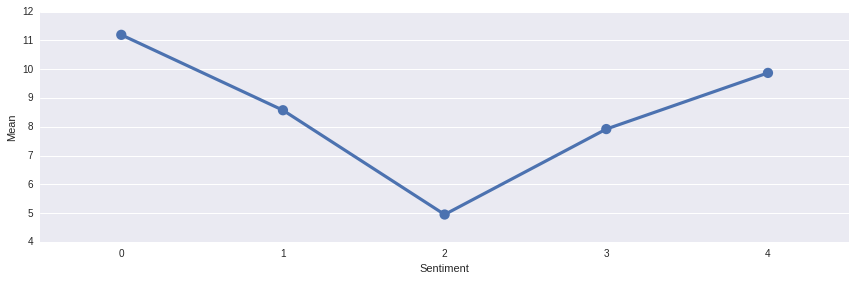

In [3]:
# add Length column to data
add_length(train)
# create a dataframe with analysis of the length data
length_df = get_average_length_sentiment(train)
# factor plot the length versus sentiment
sns.factorplot('Sentiment','Mean', data=length_df,size=4,aspect=3)

<p>
    As we can see the longer a sentence is the more extreme it is. This relationship makes sense with the expectation that longer reviews will come from more passionate reviewers and thus stronger sentiment (0-1,3-4)
    This relationship 
</p>

<p>
    1. why do we want to look at sentence
    2. how do we do it overall
</p>

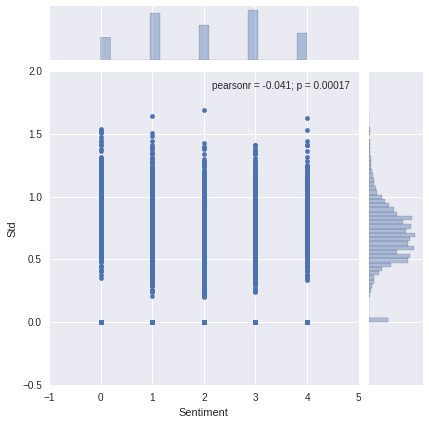

In [4]:
def sentence_df(df):
    """
    sentence_df() groups phrases with same 
    Sentence Id and returns a dataframe with
    each groups's whole sentence's sentiment,
    the phrases' sentiment's standard deviation
    and variance
    """
    # dictionary to store values collected from sentence group
    sentence_dict = {}
    # loop through dataframes with the same sentence ID
    for i in range(df['SentenceId'].max()):
        # select data with sentence ID i
        select_df = df[df['SentenceId'] == i]
        # internally drop Nan data
        if not select_df.empty:
            # store a list with the structure "[overall_sentiment, variance, standard deviation]"
            sentence_dict[i] = [select_df.iloc[0, 3], select_df['Sentiment'].var(), select_df['Sentiment'].std()]
    # convert dictionary to pandas dataframe
    sentence_df = pd.DataFrame(sentence_dict.items(), columns=["Sentence", "Sentiment_Var_Std"])
    
    # split the 'Sentiment_Var_Std' column to 'Sentiment', 'Var', 'Std'
    sentence_df['Sentiment'] = sentence_df['Sentiment_Var_Std'].apply(lambda x: x[0])
    sentence_df['Var'] = sentence_df['Sentiment_Var_Std'].apply(lambda x: x[1])
    sentence_df['Std'] = sentence_df['Sentiment_Var_Std'].apply(lambda x: x[2])
        
    return sentence_df.drop('Sentiment_Var_Std', axis=1)

# get a dataframe grouped by sentence ID of train dataset
sentence_df = sentence_df(train)
# plot the joint plot of standard deviation of phases within same sentence ID over sentiments 
sns.jointplot(x="Sentiment", y="Std", data=sentence_df[['Sentiment', 'Std']]);

We can roughly tell that the distribution of each sentiment group is different from each other, but the pattern is very vague. We can hardly tell anything from that graph. In order to verify our hypothesis that the difference between each sentiment group is statistically significant. We further explore the data by seperating the data into different sentiment groups and explore their differences.

In [5]:
# seperates the dataframe according to sentiment and sort the data with standard deviation
sentence_zero_df = sentence_df[sentence_df['Sentiment'] == 0].sort_values(['Std'], ascending=True).dropna()
sentence_one_df = sentence_df[sentence_df['Sentiment'] == 1].sort_values(['Std'], ascending=True).dropna()
sentence_two_df = sentence_df[sentence_df['Sentiment'] == 2].sort_values(['Std'], ascending=True).dropna()
sentence_three_df = sentence_df[sentence_df['Sentiment'] == 3].sort_values(['Std'], ascending=True).dropna()
sentence_four_df = sentence_df[sentence_df['Sentiment'] == 4].sort_values(['Std'], ascending=True).dropna()

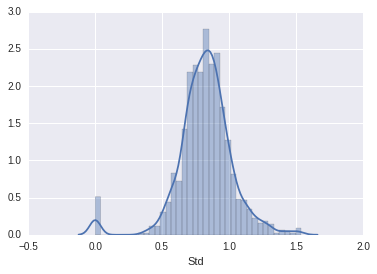

In [6]:
sns.distplot(sentence_zero_df['Std'])

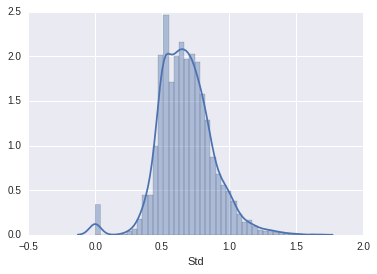

In [7]:
sns.distplot(sentence_one_df['Std'])

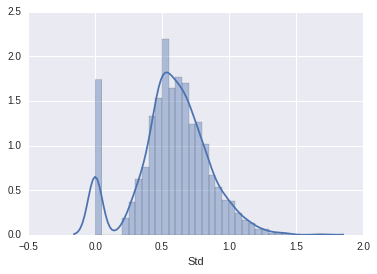

In [8]:
sns.distplot(sentence_two_df['Std'])

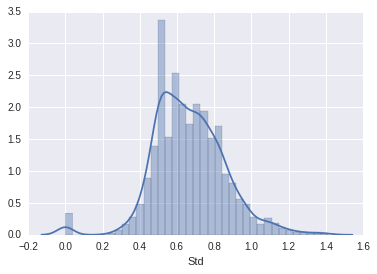

In [9]:
sns.distplot(sentence_three_df['Std'])

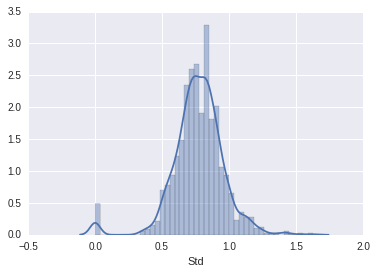

In [10]:
sns.distplot(sentence_four_df['Std'])

<p>
    1. Analyze the significance of these differences 
    2. Use the result to interpret our findings 
    3. potential ways of using that data
</p>

<p>
    1. why do we want to look at word
    2. how do we do it overall
</p>

In [17]:
def word_df(df):
    word_dict = {}
    for index, row in df.iterrows():
        list = createLowerWordList(row["Phrase"])
        sentiment = row["Sentiment"]
        
        for word in list:
            if word in word_dict:
                word_dict[word][0] += 1
                word_dict[word][1].append(sentiment)
            else:
                word_dict[word] = [1, [sentiment]]
    
    word_df = pd.DataFrame(word_dict.items(), columns=["Word", "Frequency-Sentiment"])
    word_df['Frequency'] = word_df['Frequency-Sentiment'].apply(lambda x: x[0])
    word_df['Sentiment'] = word_df['Frequency-Sentiment'].apply(lambda x: np.mean(x[1]))
    word_df['Std'] = word_df['Frequency-Sentiment'].apply(lambda x: float(np.std(x[1])))
    return word_df.drop('Frequency-Sentiment', 1).dropna().sort_values(['Frequency'], ascending=False)

<p>
    1. cut the frequency (articulate reasons for that)
    2. choose the sentiment range (articulate reasons for that)
    3. std (articulate reasons for that)
    4. create a word list and show potential ways to use it
    5. compare it to result in the discussion form
</p>

In [18]:
word_df = word_df(train)

         Frequency   Sentiment         Std
count   238.000000  238.000000  238.000000
mean    221.794118    2.224347    0.916581
std     223.556305    0.800942    0.134568
min     101.000000    0.557522    0.578953
25%     125.000000    1.362179    0.818704
50%     153.000000    2.592403    0.912462
75%     227.000000    2.840280    1.004140
max    2143.000000    3.382353    1.377985
         Frequency   Sentiment         Std
count   176.000000  176.000000  176.000000
mean    206.642045    2.160039    0.856192
std     208.321873    0.853451    0.093301
min     101.000000    0.557522    0.578953
25%     123.000000    1.305273    0.801280
50%     152.500000    2.585518    0.858146
75%     222.250000    2.858402    0.932878
max    2143.000000    3.382353    0.999897
              Word  Frequency  Sentiment       Std
12612          too       2143   1.366309  0.851955
1145          love       1296   2.536265  0.938007
8717           bad       1211   1.007432  0.943023
12152      minutes    

/home/wilson/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


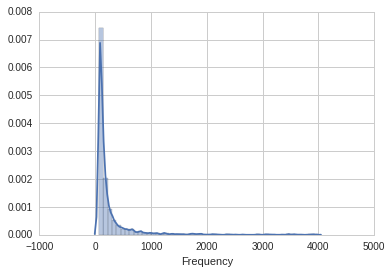

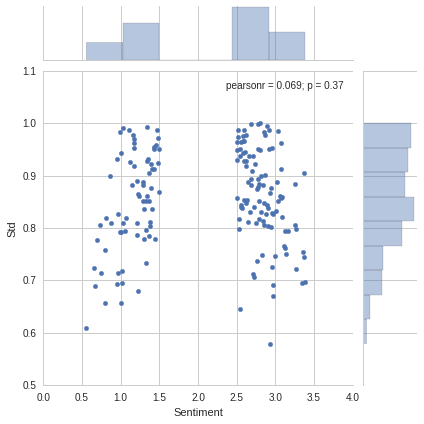

In [46]:
sns.distplot(word_df[(word_df['Frequency'] > 64) & (word_df['Frequency'] < 4700)].Frequency);
word_df['Frequency'].mean()
#Start by removing the lower frequncy words and grabbing sentiment averages more extreme than 1.5 - 2.5
word_list_adapted = word_df[(word_df['Frequency'] > 100) & ((word_df['Sentiment'] >= 2.5) | (word_df['Sentiment'] <= 1.5))]
print word_list_adapted.describe()
#To grab only strongly correlated words we want to grab ones with a very low std
word_list_adapted = word_list_adapted[ word_list_adapted['Std'] <= 1]
print word_list_adapted.describe()
print word_list_adapted
sns.jointplot(word_list_adapted['Sentiment'], word_list_adapted['Std'])

word_list_large = word_list_adapted[(word_df['Frequency'] > 100) & (word_df['Sentiment'] >= 2.5)]
word_list_small = word_list_adapted[(word_df['Frequency'] > 100) & (word_df['Sentiment'] <= 1.5)]                                

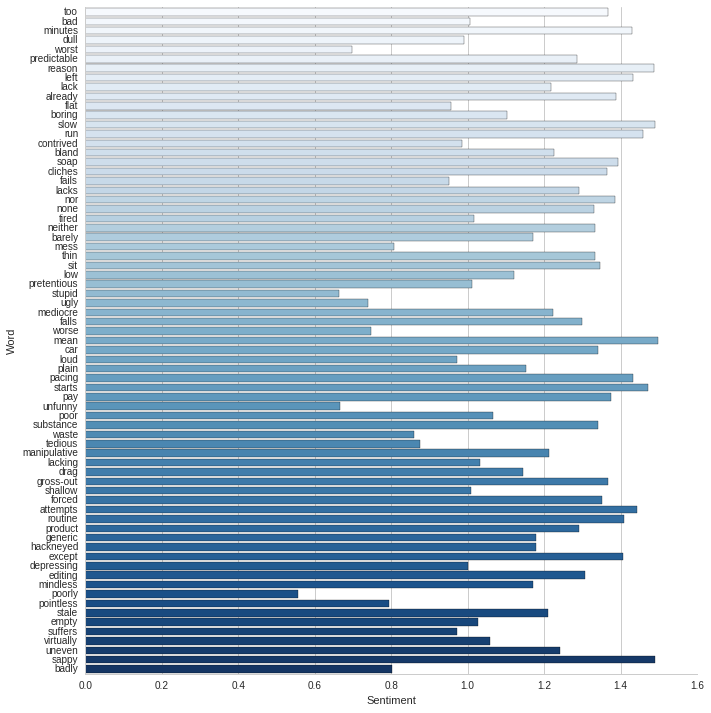

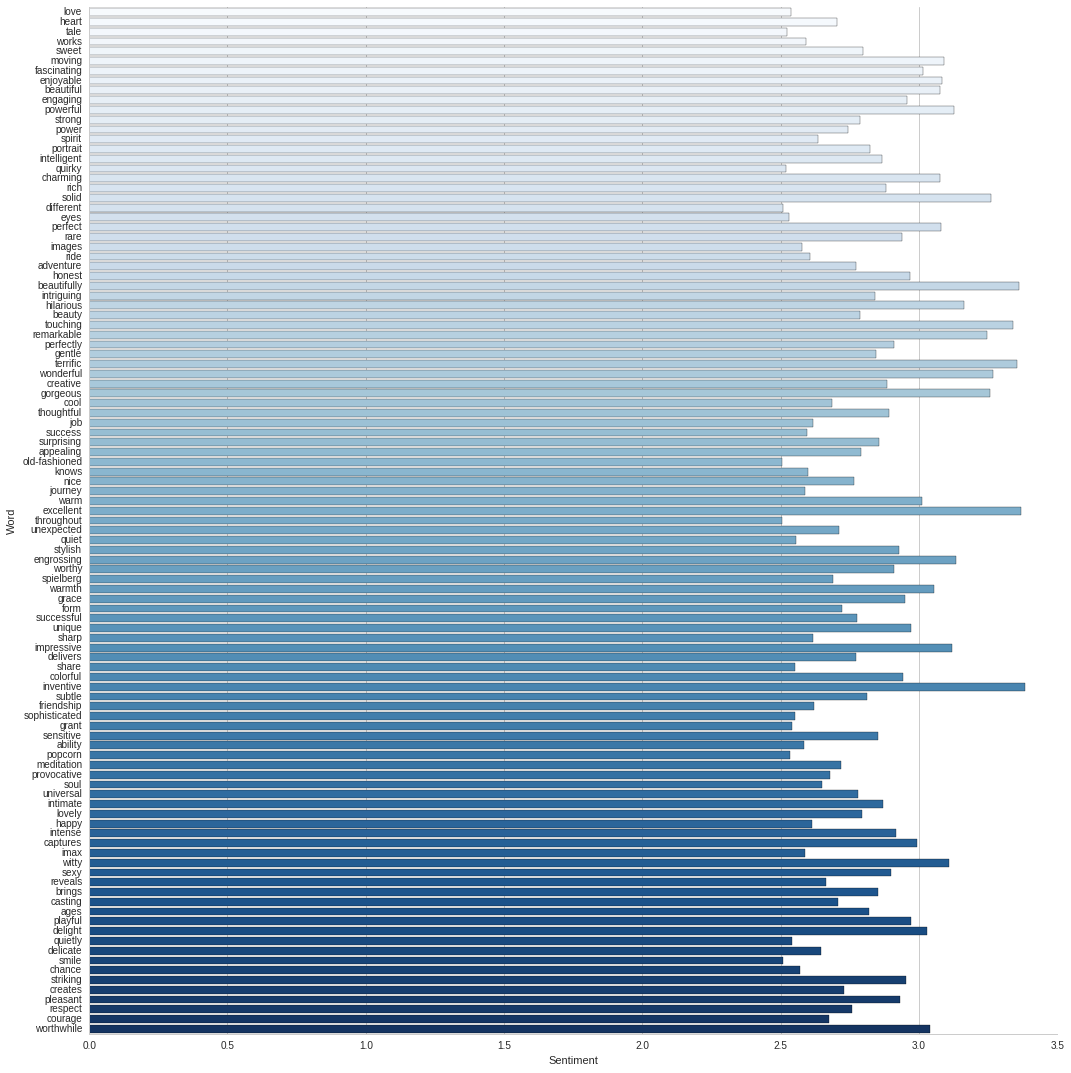

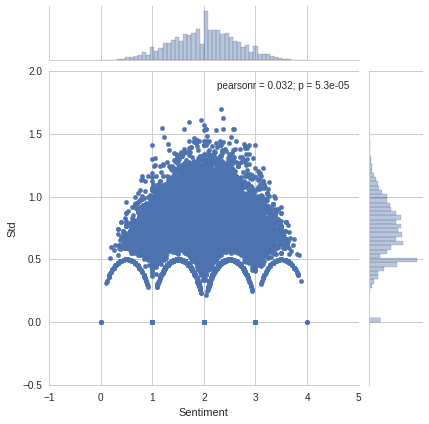

In [48]:
sns.set_style("whitegrid")
# ax = sns.barplot(x='Sentiment',y = 'Word' ,data=word_list_adapted,size=5, aspect=1)
sns.factorplot(x='Sentiment',y='Word', data=word_list_small,kind="bar",palette="Blues",size=10,aspect=1,legend_out=False);
sns.factorplot(x='Sentiment',y='Word', data=word_list_large,kind="bar",palette="Blues",size=15,aspect=1,legend_out=False);
sns.jointplot(word_df['Sentiment'], word_df['Std']);

<p>
    After we filter out the words that are not frequent enough(>100 times), not extreme enough(1.5-2.5 sentiment), not standard enough(too much variability std > 1.0) we have list of words(that can be furthur narrowed by being even more picky about our data) that are a fairly strong indicator of their associated mean sentiment which we calculated from the aggregate data. Essentially getting a list of words that are fairly negative or positive(taking into account the usage in multiple sentences)
    We can compare the words in this list to lists found online to see if we get similar results to what other people identified as key words. 
</p>

<p>
    From our exploration of data we have found some interesting relationships and observations about the data provided which we can use in our ml model. By analyzing the length and words inside of the phrases and sentences we can see that overall length and phrase length have positive correlation to the extremity of provided phrase/sentence. When looking at distribution of sentences as a whole per sentiment we can observe the variability of the phrases inside the sentence. Finally, from our word list we can filter to find strongly correlated-words. These relationships can be converted into features for our modeling work later on. 
</p>